In [1]:
from math import pi
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cpl_main as cpl

In [2]:
team_ref = pd.read_csv('datasets/teams.csv')

In [3]:
year = input('enter the year: ')

enter the year: 2019


In [4]:
results = pd.read_csv(f'datasets/{year}/cpl-{year}-results.csv')
stats = pd.read_csv(f'datasets/{year}/cpl-{year}-stats.csv')
player_info = pd.read_csv(f'datasets/{year}/player-{year}-info.csv')

In [5]:
prev_rated_forwards = pd.read_csv(f'datasets/{year}/cpl-{year}-forwards.csv')
prev_rated_midfielders = pd.read_csv(f'datasets/{year}/cpl-{year}-midfielders.csv')
prev_rated_defenders = pd.read_csv(f'datasets/{year}/cpl-{year}-defenders.csv')
prev_rated_goalscorers = pd.read_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv')
prev_rated_keepers = pd.read_csv(f'datasets/{year}/cpl-{year}-keepers.csv')

In [6]:
if year == '2019':
    team_ref = team_ref[1:]
    results_old = results[:-7].copy()
else:
    results_old = results[results['hr'] != 'E'].copy()

In [7]:
results.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,I1,0,27,4,1,1,Forge FC,D,York9 FC,D,0,0,4-27-2019 Forge FC D 1-1 D York9 FC,Tim Hortons Field,https://canpl.ca/matchcentre/4ilfbdmlp4zuj7k3c...
1,I2,0,28,4,1,0,Pacific FC,W,HFX Wanderers FC,L,1,0,4-28-2019 Pacific FC W 1-0 L HFX Wanderers FC,Westhills Stadium,https://canpl.ca/matchcentre/4itgc6bq5l5c7iv5k...
2,I3,0,1,5,1,2,Pacific FC,L,Valour FC,W,0,0,5-1-2019 Pacific FC L 1-2 W Valour FC,Westhills Stadium,https://canpl.ca/matchcentre/4j6hzym2ji5zgrm0w...
3,I4,0,4,5,2,1,HFX Wanderers FC,W,Forge FC,L,0,0,5-4-2019 HFX Wanderers FC W 2-1 L Forge FC,Wanderers Grounds,https://canpl.ca/matchcentre/4jopa68wp2k7cntkj...
4,I5,0,4,5,2,1,Cavalry FC,W,York9 FC,L,0,0,5-4-2019 Cavalry FC W 2-1 L York9 FC,ATCO Field,https://canpl.ca/matchcentre/4kj2hnlgvv3ncwouf...


In [8]:
results_old.head(5)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
0,I1,0,27,4,1,1,Forge FC,D,York9 FC,D,0,0,4-27-2019 Forge FC D 1-1 D York9 FC,Tim Hortons Field,https://canpl.ca/matchcentre/4ilfbdmlp4zuj7k3c...
1,I2,0,28,4,1,0,Pacific FC,W,HFX Wanderers FC,L,1,0,4-28-2019 Pacific FC W 1-0 L HFX Wanderers FC,Westhills Stadium,https://canpl.ca/matchcentre/4itgc6bq5l5c7iv5k...
2,I3,0,1,5,1,2,Pacific FC,L,Valour FC,W,0,0,5-1-2019 Pacific FC L 1-2 W Valour FC,Westhills Stadium,https://canpl.ca/matchcentre/4j6hzym2ji5zgrm0w...
3,I4,0,4,5,2,1,HFX Wanderers FC,W,Forge FC,L,0,0,5-4-2019 HFX Wanderers FC W 2-1 L Forge FC,Wanderers Grounds,https://canpl.ca/matchcentre/4jopa68wp2k7cntkj...
4,I5,0,4,5,2,1,Cavalry FC,W,York9 FC,L,0,0,5-4-2019 Cavalry FC W 2-1 L York9 FC,ATCO Field,https://canpl.ca/matchcentre/4kj2hnlgvv3ncwouf...


In [9]:
results_diff = pd.concat([results, results_old]).drop_duplicates(keep=False)

In [10]:
results_diff.head(2)

,game,s,d,m,hs,as,home,hr,away,ar,csh,csa,combined,venue,links
93,I94,1,16,10,0,4,Valour FC,L,York9 FC,W,0,1,10-16-2019 Valour FC L 0-4 W York9 FC,IG Field,https://canpl.ca/matchcentre/5oyl3jwgr2padsvpk...
94,I95,1,16,10,3,1,FC Edmonton,W,Pacific FC,L,0,0,10-16-2019 FC Edmonton W 3-1 L Pacific FC,Clarke Stadium,https://canpl.ca/matchcentre/5nw6ub2q95ptd6n71...


In [11]:
schedule = cpl.get_schedule(results_diff)
schedule

,game,home,away
0,I94,Valour FC,York9 FC
1,I95,FC Edmonton,Pacific FC
2,I96,York9 FC,HFX Wanderers FC
3,I97,Cavalry FC,FC Edmonton
4,I98,Pacific FC,Valour FC


In [12]:
team1, team2, team3, team4, team5, team6, team7, team8 = cpl.get_team_files(schedule,team_ref)

In [13]:
print(team1, team2, team3, team4, team5, team6, team7, team8)

VFC Y9 FCE PFC Y9 HFX CFC FCE


In [15]:
standings = cpl.get_standings(results,1,team_ref)
if results_old.empty == True:
    standings_old = cpl.get_standings(results,1,team_ref)
else:
    standings_old = cpl.get_standings(results_old,1,team_ref)

In [16]:
standings

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Cavalry FC,28,62,84,2.21,19,4,5,32,51,19,26,8,25,11
1,2,Forge FC,28,56,84,2.00,17,6,5,19,45,26,25,10,20,16
2,3,York9 FC,28,34,84,1.21,9,12,7,2,39,37,18,19,21,18
3,4,FC Edmonton,28,32,84,1.14,8,12,8,-6,27,33,15,14,12,19
4,5,Pacific FC,28,31,84,1.11,8,13,7,-11,35,46,22,20,13,26
5,6,Valour FC,28,28,84,1.00,8,16,4,-22,30,52,17,32,13,20
6,7,HFX Wanderers FC,28,28,84,1.00,6,12,10,-14,21,35,13,9,8,26


In [17]:
standings_old

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Cavalry FC,27,59,81,2.19,18,4,5,30,48,18,23,7,25,11
1,2,Forge FC,28,56,84,2.00,17,6,5,19,45,26,25,10,20,16
2,3,York9 FC,26,31,78,1.19,8,11,7,0,35,35,18,17,17,18
3,4,FC Edmonton,26,29,78,1.12,7,11,8,-6,23,29,12,13,11,16
4,5,Valour FC,26,28,78,1.08,8,14,4,-16,30,46,17,28,13,18
5,6,Pacific FC,26,28,78,1.08,7,12,7,-11,32,43,20,20,12,23
6,7,HFX Wanderers FC,27,25,81,0.93,5,12,10,-16,19,35,13,9,6,26


In [18]:
def get_column_overall(lst):
    data = stats[lst]
    data = data.groupby(['team']).sum()
    data['overall'] = data.sum(axis=1) / data.shape[1]
    data['overall'] = data['overall'] / data['overall'].max()
    data['overall'] = data['overall'] - 0.1
    data = data[['overall']]
    data = data.reset_index()
    data.pop('team')
    return data['overall'].values

In [19]:
offense = get_column_overall(['team','goals','chances','assists','shots','s-target','passes','crosses','duels','tackles'])
offense

array([0.8582527 , 0.79129113, 0.88932817, 0.71150124, 0.8572574 ,
       0.7546862 , 0.9       ])

In [20]:
central = get_column_overall(['team','goals','assists','touches','passes','pass-acc','crosses','cross-acc','chances','duels','tackles'])
central

array([0.85427454, 0.79580175, 0.9       , 0.72299917, 0.8581402 ,
       0.75253234, 0.89889821])

In [21]:
defense = get_column_overall(['team','tackles','t-won','clearances','interceptions','duels','d-won'])
print(defense)

[0.88515601 0.81123902 0.8822781  0.9        0.87500757 0.82986974
 0.87152378]


In [22]:
keeping = get_column_overall(['team','cs','saves','shots faced','claimed crosses'])
keeping

array([0.67060932, 0.70645161, 0.65985663, 0.67777778, 0.9       ,
       0.79964158, 0.78530466])

In [24]:
comparing = standings.sort_values(by=['team'])
comparing

,rank,team,gp,pts,tpp,ppg,w,l,d,gd,gf,ga,gfh,gah,gfa,gaa
0,1,Cavalry FC,28,62,84,2.21,19,4,5,32,51,19,26,8,25,11
3,4,FC Edmonton,28,32,84,1.14,8,12,8,-6,27,33,15,14,12,19
1,2,Forge FC,28,56,84,2.00,17,6,5,19,45,26,25,10,20,16
6,7,HFX Wanderers FC,28,28,84,1.00,6,12,10,-14,21,35,13,9,8,26
4,5,Pacific FC,28,31,84,1.11,8,13,7,-11,35,46,22,20,13,26
5,6,Valour FC,28,28,84,1.00,8,16,4,-22,30,52,17,32,13,20
2,3,York9 FC,28,34,84,1.21,9,12,7,2,39,37,18,19,21,18


In [95]:
comparing['gd'] * central + comparing['gd'].max()

0    59.336785
3    27.225189
1    49.100000
6    21.878012
4    22.560458
5    15.444288
2    33.797796
Name: gd, dtype: float64

In [86]:
comparing['gf'] / offense

0    59.423058
3    34.121449
1    50.599994
6    29.515057
4    40.827878
5    39.751621
2    43.333333
Name: gf, dtype: float64

In [88]:
100 - (comparing['ga'] * defense * keeping)

0    88.721716
3    81.087663
1    84.863397
6    78.650000
4    63.774686
5    65.492886
2    74.676768
Name: ga, dtype: float64

In [68]:
def get_team_graphs(stats,standings):
    comparing = standings.sort_values(by=['team'])
    
    def get_column_overall(lst):
        data = stats[lst]
        data = data.groupby(['team']).sum()
        data['overall'] = data.sum(axis=1) / data.shape[1]
        data['overall'] = data['overall'] / data['overall'].max()
        data['overall'] = data['overall'] - 0.1
        data = data[['overall']]
        data = data.reset_index()
        data.pop('team')
        return data['overall']
    
    offense = get_column_overall(['team','goals','chances','assists','shots','s-target','passes','crosses','duels','tackles'])
    central = get_column_overall(['team','goals','assists','touches','passes','pass-acc','crosses','cross-acc','chances','duels','tackles'])
    defense = get_column_overall(['team','tackles','t-won','clearances','interceptions','duels','d-won'])
    keeping = get_column_overall(['team','cs','saves','shots faced','claimed crosses'])
    
    g_cols = ['chances','goals','assists','pass-acc','cross-acc','shots','s-target','s-box','s-out-box','clearances','interceptions','yellow','shots faced','claimed crosses','cs']
    team_mean = stats.copy()
    goals = stats[['team','goals']]
    assists = stats[['team','assists']]
    team_mean = team_mean.select_dtypes(include=['float'])
    team_mean.insert(0,'team',stats['team'])
    try:
        team_mean = team_mean.groupby(['team']).mean()
    except:
        teams = stats.team.unique()
        team_mean = pd.DataFrame(columns=['team','clean sheets','big chances','attacking plays','combination plays','accuracy','defending','chance creation','finishing'])
        team_mean['team'] = teams
        for col in team_mean.columns:
            if col == 'team':
                continue
            else:
                team_mean[col] = 0.5
        return team_mean

    team_mean = team_mean[g_cols]
    team_mean['claimed crosses'] = team_mean['claimed crosses'] * 15
    team_mean['cs'] = team_mean['cs'] * 100
    team_mean['goals'] = goals.groupby(['team']).sum()
    team_mean['assists'] = assists.groupby(['team']).sum()
    team_mean['big chances'] = (team_mean['goals'] + 2) / team_mean['chances']
    team_mean['attacking plays'] = (team_mean['assists'] + 2) / team_mean['chances']
    team_mean['combination plays'] = team_mean['assists'] / team_mean['goals'] * 100
    team_mean['offense'] = comparing['gf'].values / offense.values
    team_mean['midfield'] = comparing['gd'].values * central.values + comparing['gd'].max()
    team_mean['defending'] = 100 - (comparing['ga'].values * defense.values)
    team_mean['chance creation'] = (team_mean['shots'] + team_mean['s-box'] + team_mean['s-out-box']) * team_mean['s-target'] * 100
    team_mean['finishing'] = team_mean['chance creation'] * team_mean['goals']
    team_mean = team_mean.rename(columns={'cs':'clean sheets'})

    for col in team_mean.columns:
        if team_mean[col].max() > 1.0:
            team_mean[col] = team_mean[col] / team_mean[col].max()
        if team_mean[col].max() < 0.2:
            team_mean[col] = team_mean[col] * 5
        else:
            continue
    for col in team_mean.columns:
        team_mean[col] = team_mean[col] - 0.1
    
    team_mean = team_mean[['clean sheets','big chances','attacking plays','combination plays','offense','midfield','defending','chance creation','finishing']]
    team_mean = team_mean.reset_index()
    return team_mean

In [69]:
team_graphs = get_team_graphs(stats,standings)
team_graphs

,team,clean sheets,big chances,attacking plays,combination plays,offense,midfield,defending,chance creation,finishing
0,Cavalry FC,0.825833,0.900000,0.750245,0.681250,0.900000,0.900000,0.900000,0.710718,0.900000
1,FC Edmonton,0.505827,0.559253,0.556867,0.813462,0.474212,0.358825,0.780348,0.375840,0.217924
2,Forge FC,0.900000,0.831001,0.900000,0.900000,0.751521,0.727480,0.826411,0.631668,0.746089
3,HFX Wanderers FC,0.525111,0.365814,0.253622,0.557895,0.396694,0.268709,0.723495,0.469590,0.178102
4,Pacific FC,0.332734,0.698559,0.645492,0.757143,0.587071,0.280210,0.618300,0.444518,0.389744
5,Valour FC,0.417949,0.536581,0.560705,0.858333,0.568960,0.160282,0.583402,0.549599,0.400790
6,York9 FC,0.423316,0.520303,0.449385,0.710811,0.629234,0.469593,0.714522,0.900000,0.850804


In [96]:
def make_radar(data,team_ref,year):
    team = data['team']
    info = team_ref[team_ref['team'] == team]
    colour1 = info['colour1'].values
    colour1 = colour1[0]
    colour2 = info['colour2'].values
    colour2 = colour2[0]
    # number of variable
    categories=list(team_graphs)[1:]
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = data.drop('team').values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_title(data['team'], color=colour1, size=24)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.50","0.75"], color='silver', size=12)
    plt.ylim(0,1)
    # Plot data
    ax.plot(angles, values, linewidth=8, linestyle='solid', color=colour1)

    # Fill area
    ax.fill(angles, values, colour2, alpha=0.4)
    filename = f'static/images/{year}/cpl-{year}-{team}-radar.png'
    plt.savefig(filename)

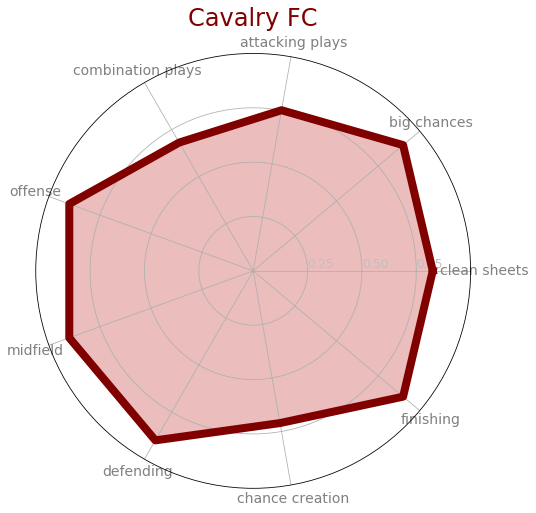

In [74]:
make_radar(team_graphs.loc[0],team_ref,year)

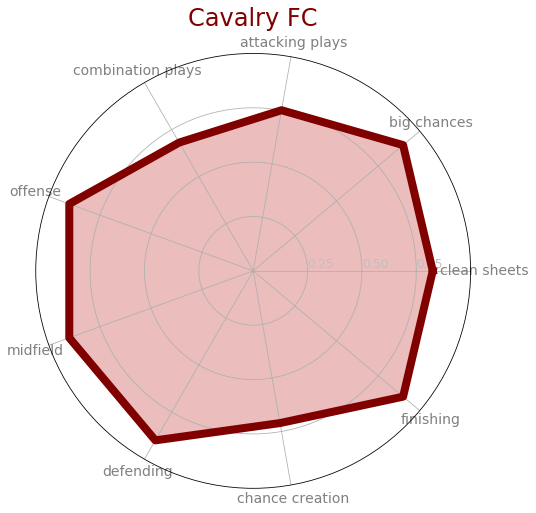

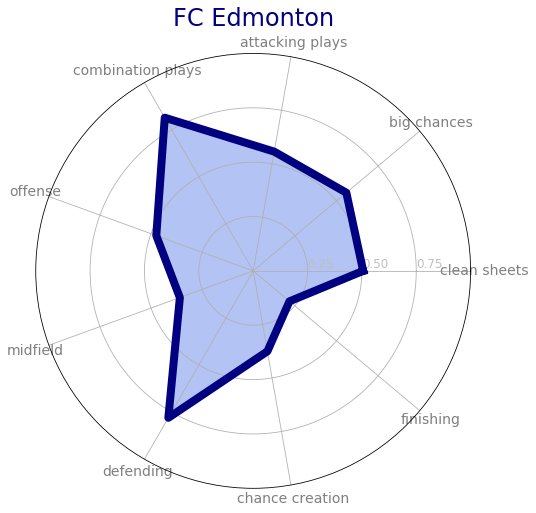

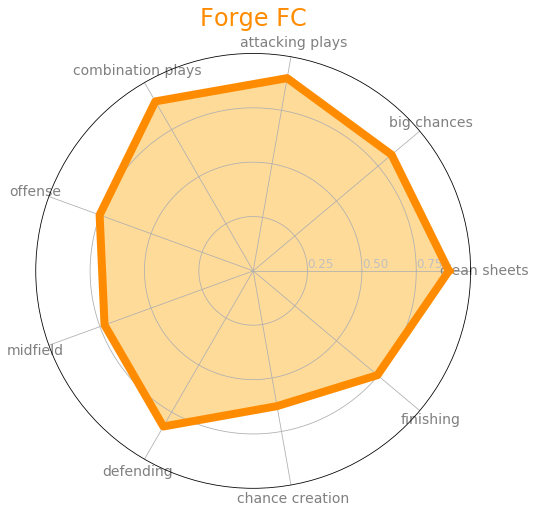

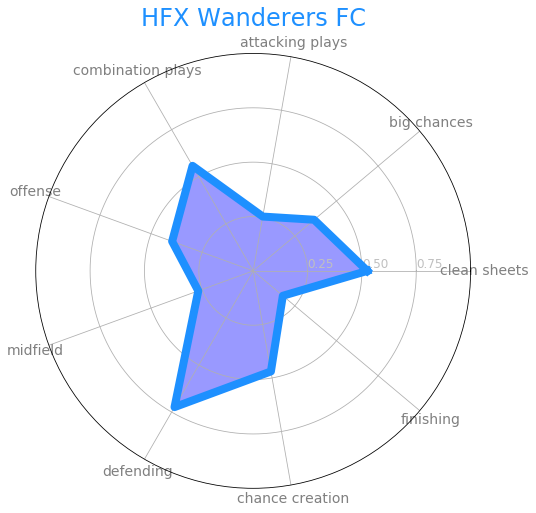

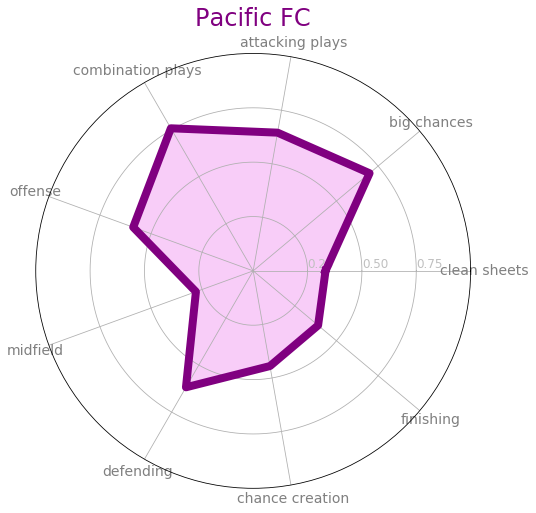

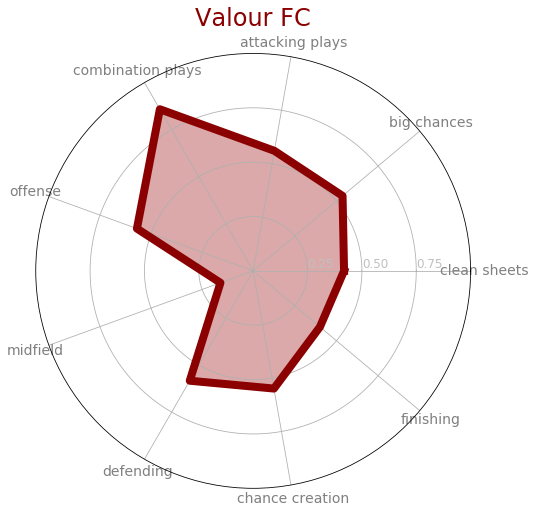

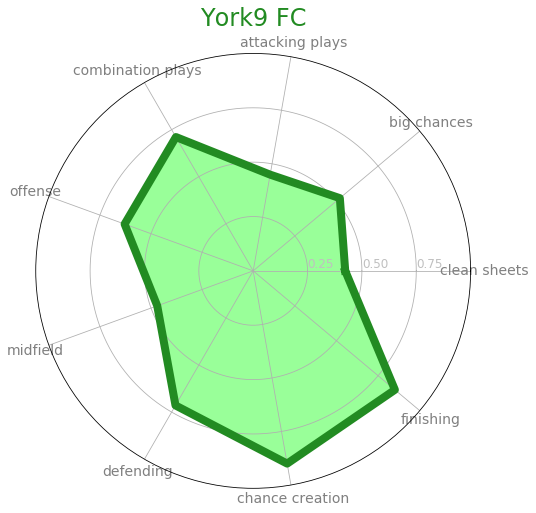

In [97]:
for i in range(team_graphs.shape[0]):
    make_radar(team_graphs.loc[i],team_ref,year)

In [20]:
compare_standings_test = cpl.compare_standings(standings,standings_old,team_ref)

In [18]:
compare_standings_test

,team,change
0,Atletico Ottawa,0
1,Cavalry FC,0
2,FC Edmonton,0
3,Forge FC,0
4,HFX Wanderers FC,0
5,Pacific FC,0
6,Valour FC,0
7,York9 FC,0


In [19]:
previous_rankings = pd.read_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv')
#previous_rankings.to_csv(f'datasets/{year}/cpl-{year}-previous_rankings.csv',index=False)

In [20]:
power_rankings = cpl.get_power_rankings(standings,standings_old,team_ref,results,previous_rankings)
power_rankings

,rank,team,form,old_rank,change,goal_bonus,w_bonus,crest,colour,previous
0,1,Atletico Ottawa,0.0-0.0-0.0,1,0,0,0,Atletico_Ottawa_nav.png,cpl-ao,0
1,2,Cavalry FC,0.0-0.0-0.0,2,0,0,0,cavalry_fc_nav.png,cpl-cfc,0
2,3,FC Edmonton,0.0-0.0-0.0,3,0,0,0,FC_Edmonton_nav.png,cpl-fce,0
3,4,Forge FC,0.0-0.0-0.0,4,0,0,0,Forge_FC_nav.png,cpl-ffc,0
4,5,HFX Wanderers FC,0.0-0.0-0.0,5,0,0,0,HFX_Wanderers_FC.png,cpl-hfx,0
5,6,Pacific FC,0.0-0.0-0.0,6,0,0,0,Pacific_FC_nav.png,cpl-pfc,0
6,7,Valour FC,0.0-0.0-0.0,7,0,0,0,Valour_FC_nav.png,cpl-vfc,0
7,8,York9 FC,0.0-0.0-0.0,8,0,0,0,York_9_FC_nav.png,cpl-y9,0


In [21]:
game_week, goals, big_win, top_result, low_result,other_result = cpl.get_weeks_results(results[results['s'] <= 1],standings,team_ref)
game_week

,home,hs,away,as
0,NA,0,NA,0


In [22]:
#championship = get_standings(results,2)
#championship = championship[championship['gp'] > 1]
#championship

In [23]:
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)

In [24]:
#standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)

In [25]:
results_brief = cpl.get_results_brief(results,team_ref)

In [26]:
results_brief.head(5)

,d,m,hs,as,home,hr,away,ar,summary,team
0,7,1,0,0,Atletico Ottawa,E,HFX Wanderers FC,E,E H 0 - 0 HFX,Atletico Ottawa
1,7,1,0,0,Atletico Ottawa,E,Pacific FC,E,E H 0 - 0 PFC,Atletico Ottawa
2,7,1,0,0,Atletico Ottawa,E,York9 FC,E,E H 0 - 0 Y9,Atletico Ottawa
3,7,1,0,0,Atletico Ottawa,E,Cavalry FC,E,E H 0 - 0 CFC,Atletico Ottawa
4,7,1,0,0,Atletico Ottawa,E,York9 FC,E,E H 0 - 0 Y9,Atletico Ottawa


In [27]:
#results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)

In [28]:
stats.head(5)

,game,team,position,number,name,first,last,minutes,touches,passes,...,clearances,interceptions,yellow,red,fouls won,fouls conceded,shots faced,saves,claimed crosses,cs
0,II1,Atletico Ottawa,m,0,Ajay Khabra,Ajay,Khabra,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,II1,Atletico Ottawa,m,0,Antoine Coupland,Antoine,Coupland,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,II1,Atletico Ottawa,m,0,Ben Fisk,Ben,Fisk,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,II1,Atletico Ottawa,m,0,Bernardinho,Bernardinho,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,II1,Atletico Ottawa,d,0,Brandon John,Brandon,John,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,fouls won,fouls conceded,shots faced,saves,claimed crosses,cs
count,152.000000,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,9.427632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.555568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
team_stats = cpl.get_stats_all(stats,team_ref)

In [31]:
team_stats.describe()

,number,minutes,touches,passes,pass-acc,crosses,cross-acc,assists,chances,goals,...,clearances,interceptions,yellow,red,fouls won,fouls conceded,shots faced,saves,claimed crosses,cs
count,152.000000,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,...,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0,152.0
mean,9.427632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,11.555568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,16.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
rated_goalscorers = cpl.top_tracked(team_stats,'goals')
rated_assists = cpl.top_tracked(team_stats,'assists')

In [33]:
rated_assists

,rank,team,name,position,number,minutes,assists
0,0,NA,NA,0,0,0,0


In [34]:
rated_assists.describe()

,rank,position,number,minutes,assists
count,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [35]:
rated_goalscorers.describe()

,rank,position,number,minutes,goals
count,1.0,1.0,1.0,1.0,1.0
mean,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0


In [36]:
rated_forwards = cpl.top_position(team_stats,'f')
rated_midfielders = cpl.top_position(team_stats,'m')
rated_defenders = cpl.top_position(team_stats,'d')
rated_keepers = cpl.top_position(team_stats,'g')
rated_offenders = cpl.top_offenders(team_stats)

In [37]:
rated_forwards.head(10)

,team,name,number,position,minutes,goals,chances,assists,shots,s-target,passes,crosses,duels,tackles,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
rated_midfielders.head(10)

,team,name,number,position,minutes,goals,assists,touches,passes,pass-acc,crosses,cross-acc,chances,duels,tackles,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
rated_defenders.head(10)

,team,name,number,position,minutes,tackles,t-won,clearances,interceptions,duels,d-won,overall
0,NA,NA,0,0,0,0,0,0,0,0,0,0


In [40]:
rated_keepers

,team,name,number,position,minutes,cs,saves,shots faced,claimed crosses,overall
0,NA,NA,0,0,0,0,0,0,0,0


In [41]:
rated_offenders.head(2)

,team,name,position,number,minutes,yellow,red,f-conceded
0,NA,NA,NA,0,0,0,0,0


In [42]:
best_eleven = cpl.get_best_eleven(team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
best_eleven

,image,first,last,flag,number,position,overall,link
0,Nathan-Ingham.jpg,Nathan,Ingham,Canada.png,1,g,0.93,https://en.wikipedia.org/wiki/Nathan_Ingham
1,Mélé-Temguia.jpg,Mélé,Temguia,Germany.png,8,d,0.96,https://en.wikipedia.org/wiki/Mélé_Temguia
2,Luca-Gasparotto.jpg,Luca,Gasparotto,Canada.png,13,d,0.92,https://en.wikipedia.org/wiki/Luca_Gasparotto
3,André-Bona.jpg,André,Bona,France.png,3,d,0.92,https://en.wikipedia.org/wiki/André_Bona
4,Marco-Bustos.jpg,Marco,Bustos,Canada.png,22,m,0.90,https://en.wikipedia.org/wiki/Marco_Bustos
5,Tristan-Borges.jpg,Tristan,Borges,Canada.png,4,m,0.89,https://en.wikipedia.org/wiki/Tristan_Borges
6,Julian-Buscher.jpg,Julian,Büscher,Germany.png,8,m,0.87,https://en.wikipedia.org/wiki/Julian_Büscher
7,Ryan-Telfer.jpg,Ryan,Telfer,Canada.png,18,m,0.78,https://en.wikipedia.org/wiki/Ryan_Telfer
8,Kyle-Bekker.jpg,Kyle,Bekker,Canada.png,3,m,0.77,https://en.wikipedia.org/wiki/Kyle_Bekker
9,Terran-Campbell.jpg,Terran,Campbell,Canada.png,14,f,0.79,https://en.wikipedia.org/wiki/Terran_Campbell


In [43]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

York9 FC Valour FC


In [44]:
compare = cpl.get_team_comparison(results_brief,q1,q2)

In [45]:
compare

,d,m,hs,as,home,hr,away,ar,summary,team
0,7,1,0,0,York9 FC,E,Valour FC,E,E H 0 - 0 VFC,York9 FC
1,7,1,0,0,York9 FC,E,Valour FC,E,E H 0 - 0 VFC,York9 FC
2,7,1,0,0,Valour FC,E,York9 FC,E,E A 0 - 0 VFC,York9 FC
3,7,1,0,0,Valour FC,E,York9 FC,E,E A 0 - 0 VFC,York9 FC


In [46]:
t1_x, t1_y = cpl.get_NB_data(compare,q1)
t2_x, t2_y = cpl.get_NB_data(compare,q2)

In [47]:
home_win, draw, away_win = cpl.get_match_prediction(q1,q2,t1_x,t1_y,t2_x,t2_y)

In [48]:
print(q1,'\nwin probability: ', round(home_win,2))

York9 FC 
win probability:  0.33


In [49]:
print(q2,'\nwin probability: ', round(away_win,2))

Valour FC 
win probability:  0.33


In [50]:
print('Draw probability: ', round(draw,2))

Draw probability:  0.33


In [51]:
round(home_win + draw + away_win,1)

1.0

In [52]:
team_form_results = cpl.get_form_results(results,team_ref)
team_form_results

,index,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,27
0,Atletico Ottawa,E H 0 - 0 HFX,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 CFC,E H 0 - 0 Y9,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 VFC,E H 0 - 0 FCE,...,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 FFC,E A 0 - 0 PFC,E A 0 - 0 VFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 PFC,E A 0 - 0 CFC
1,Cavalry FC,E H 0 - 0 Y9,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 VFC,E H 0 - 0 VFC,E H 0 - 0 FFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 HFX,...,E A 0 - 0 AO,E A 0 - 0 HFX,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 AO,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 VFC,E A 0 - 0 PFC,E A 0 - 0 FFC
2,FC Edmonton,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 PFC,E H 0 - 0 AO,E H 0 - 0 VFC,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 CFC,E H 0 - 0 AO,...,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 CFC,E A 0 - 0 PFC,E A 0 - 0 VFC,E A 0 - 0 AO,E A 0 - 0 CFC,E A 0 - 0 AO,E A 0 - 0 FFC,E A 0 - 0 HFX
3,Forge FC,E H 0 - 0 CFC,E H 0 - 0 AO,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 PFC,E H 0 - 0 Y9,E H 0 - 0 PFC,...,E A 0 - 0 CFC,E A 0 - 0 VFC,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 AO,E A 0 - 0 CFC,E A 0 - 0 FCE,E A 0 - 0 HFX,E A 0 - 0 AO,E A 0 - 0 PFC
4,HFX Wanderers FC,E H 0 - 0 AO,E H 0 - 0 CFC,E H 0 - 0 FFC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 CFC,E H 0 - 0 Y9,E H 0 - 0 PFC,E H 0 - 0 PFC,...,E A 0 - 0 VFC,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 PFC,E A 0 - 0 FFC,E A 0 - 0 AO,E A 0 - 0 FCE,E A 0 - 0 CFC
5,Pacific FC,E H 0 - 0 FCE,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FFC,E H 0 - 0 CFC,E H 0 - 0 VFC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 Y9,...,E A 0 - 0 Y9,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 CFC,E A 0 - 0 VFC,E A 0 - 0 Y9,E A 0 - 0 AO
6,Valour FC,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 HFX,E H 0 - 0 PFC,E H 0 - 0 FFC,E H 0 - 0 AO,E H 0 - 0 FFC,E H 0 - 0 HFX,E H 0 - 0 FCE,...,E A 0 - 0 PFC,E A 0 - 0 CFC,E A 0 - 0 Y9,E A 0 - 0 FCE,E A 0 - 0 FCE,E A 0 - 0 AO,E A 0 - 0 HFX,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 AO
7,York9 FC,E H 0 - 0 HFX,E H 0 - 0 VFC,E H 0 - 0 FCE,E H 0 - 0 AO,E H 0 - 0 FCE,E H 0 - 0 FFC,E H 0 - 0 VFC,E H 0 - 0 PFC,E H 0 - 0 CFC,...,E A 0 - 0 AO,E A 0 - 0 FFC,E A 0 - 0 PFC,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 FFC,E A 0 - 0 HFX,E A 0 - 0 FCE,E A 0 - 0 VFC,E A 0 - 0 PFC


In [53]:
player_info_new = cpl.update_player_info(year,player_info,rated_forwards,rated_midfielders,rated_defenders,rated_keepers)
player_info_new

12,06,2020


,team,name,position,number,nationality,dob,image,flag,link,overall
0,Atletico Ottawa,Ajay Khabra,m,0.0,Canada,1995-06-13,Ajay-Khabra.jpg,Canada.png,https://en.wikipedia.org/wiki/Ajay_Khabra,0.0
1,Atletico Ottawa,Antoine Coupland,m,0.0,Canada,2003-12-12,empty.jpg,Canada.png,https://en.wikipedia.org/wiki/Antoine_Coupland,0.0
2,Atletico Ottawa,Ben Fisk,m,0.0,Canada,1993-02-04,Ben-Fisk.jpg,Canada.png,https://en.wikipedia.org/wiki/Ben_Fisk,0.0
3,Atletico Ottawa,Bernardinho,m,0.0,Ghana,1996-07-02,empty.jpg,Ghana.png,https://en.wikipedia.org/wiki/Bernardinho_(foo...,0.0
4,Atletico Ottawa,Brandon John,d,0.0,Canada,1995-01-05,empty.jpg,Canada.png,https://en.wikipedia.org/wiki/Brandon_John,0.0
...,...,...,...,...,...,...,...,...,...,...
150,York9 FC,Nicholas Hamilton,f,0.0,Jamaica,1996-03-16,empty.jpg,Jamaica.png,https://en.wikipedia.org/wiki/Nicholas_Hamilton,0.0
151,York9 FC,Roger Thompson,d,6.0,Canada,1991-12-19,Roger-Thompson.jpg,Canada.png,https://en.wikipedia.org/wiki/Roger_Thompson,0.0
152,York9 FC,Wataru Murofushi,m,23.0,Japan,1995-06-13,Wataru-Murofushi.jpg,Japan.png,https://en.wikipedia.org/wiki/Wataru_Murofushi,0.0
153,York9 FC,Julian Altobelli,m,NaN,Canada,2002-11-04,empty.jpg,Canada.png,https://en.wikipedia.org/wiki/Canadian_Premier...,0.0


In [61]:
standings.to_csv(f'datasets/{year}/cpl-{year}-standings.csv',index=False)
#championship.to_csv(f'datasets/{year}/cpl-{year}-championship.csv',index=False)
power_rankings.to_csv(f'datasets/{year}/cpl-{year}-power_rankings.csv',index=False)
results_brief.to_csv(f'datasets/{year}/cpl-{year}-results_brief.csv',index=False)
schedule.to_csv(f'datasets/{year}/cpl-{year}-schedule.csv',index=False)
team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)

In [62]:
rated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)
rated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)
rated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)
rated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)
rated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)
rated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)
rated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)

In [30]:
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')
team_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)
best_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)
player_info.to_csv(f'datasets/{year}/player-{year}-info.csv',index=False)

"team_stats.to_csv(f'datasets/{year}/cpl-{year}-team_stats.csv',index=False)\nrated_forwards.to_csv(f'datasets/{year}/cpl-{year}-forwards.csv',index=False)\nrated_midfielders.to_csv(f'datasets/{year}/cpl-{year}-midfielders.csv',index=False)\nrated_defenders.to_csv(f'datasets/{year}/cpl-{year}-defenders.csv',index=False)\nrated_keepers.to_csv(f'datasets/{year}/cpl-{year}-keepers.csv',index=False)\nrated_offenders.to_csv(f'datasets/{year}/cpl-{year}-discipline.csv',index=False)\nrated_goalscorers.to_csv(f'datasets/{year}/cpl-{year}-rated_goalscorers.csv',index=False)\nrated_assists.to_csv(f'datasets/{year}/cpl-{year}-rated_assists.csv',index=False)\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\n#h1_roster.to_csv(f'datasets/{year}/teams/cpl-{year}-{q1}_final_scores.csv')\nteam_form_results.to_csv(f'datasets/{year}/cpl-{year}-team_form.csv',index=False)\nbest_eleven.to_csv(f'datasets/{year}/cpl-{year}-best_eleven.csv',index=False)\nplayer_info.to_csv(f'

In [54]:
# home side
q1 = schedule.iloc[3]['home']
# away side
q2 = schedule.iloc[3]['away']
print(q1,q2)

York9 FC Valour FC


In [55]:
game_info = schedule[schedule['home'] == q1]
game_info = game_info[game_info['away'] == q2]
game_info

,game,home,away
3,II4,York9 FC,Valour FC
38,II39,York9 FC,Valour FC


In [56]:
game_h = cpl.get_home_away_comparison(stats,game_info,q1)
game_a = cpl.get_home_away_comparison(stats,game_info,q2)

/home/todd/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [57]:
h1_roster = cpl.get_compare_roster(results,q1,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h1_roster

,name,number,position,overall
0,Colm Vance,31,g,0.0
1,Diyaeddine Abzi,20,d,0.0
2,Fugo Segawa,0,d,0.0
3,Luca Gasparotto,13,d,0.0
4,Matthew Arnone,0,d,0.0
5,Brian López,0,m,0.0
6,Chris Mannella,0,m,0.0
7,Emilio Estevez,11,m,0.0
8,Joseph DiChiara,8,m,0.0
9,Adrián Ugarriza,0,f,0.0


In [58]:
h2_roster = cpl.get_compare_roster(results,q2,team_stats,team_ref,rated_forwards,rated_midfielders,rated_defenders,rated_keepers,player_info)
h2_roster

,name,number,position,overall
0,James Pantemis,0,g,0.0
1,Amir Soto,0,d,0.0
2,Andrew Jean-Baptiste,0,d,0.0
3,Arnold BoukaMoutou,0,d,0.0
4,Raphaël Garcia,2,d,0.0
5,Brett Levis,0,m,0.0
6,Diego Gutiérrez,8,m,0.0
7,Dylan Carreiro,10,m,0.0
8,Fraser Aird,0,m,0.0
9,Daryl Fordyce,0,f,0.0


In [59]:
team1_history = cpl.get_team_history(results,q1)
team1_history

,d,m,hs,as,home,hr,away,ar
90,7,1,0,0,York9 FC,E,Forge FC,E
97,7,1,0,0,York9 FC,E,HFX Wanderers FC,E
102,7,1,0,0,York9 FC,E,FC Edmonton,E
104,7,1,0,0,York9 FC,E,Valour FC,E
111,7,1,0,0,York9 FC,E,Pacific FC,E


In [60]:
team1_history = cpl.get_five_game_form(results,q1)

In [61]:
team1_history

,0
w,0.0
l,0.0
d,0.0


In [62]:
for i in team1_history:
    if i == 'W':
        print(3)
    if i == 'L':
        print(0)
    if i == 'D':
        print(1)

In [63]:
team2_history = cpl.get_team_history(results,q2)
team2_history

,d,m,hs,as,home,hr,away,ar
76,7,1,0,0,Valour FC,E,Atletico Ottawa,E
83,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
96,7,1,0,0,Valour FC,E,Forge FC,E
100,7,1,0,0,Valour FC,E,HFX Wanderers FC,E
110,7,1,0,0,Valour FC,E,Atletico Ottawa,E
